In [2]:
from marvin.tools import Cube, Maps
from astropy.io import fits
from astropy.table import Table, join, Column, vstack
from astropy import units as u 
import photutils
from matplotlib import pyplot as plt
import photutils
import datetime
import pandas as pd
import numpy as np
import os
from astropy.table import Table, join, vstack, Column, unique
from astropy import units as u 
import math as m
import csv
from collections import Counter
from scipy.stats import ks_2samp
from scipy import stats
from astropy.io import ascii

[INFO]: No release version set. Setting default to DR15
[WARNING]: path /home/ophelie/sas/mangawork/manga/spectro/redux/v2_4_3/drpall-v2_4_3.fits cannot be found. Setting drpall to None. (MarvinUserWarning)
[WARNING]: path /home/ophelie/sas/mangawork/manga/spectro/analysis/v2_4_3/2.2.1/dapall-v2_4_3-2.2.1.fits cannot be found. Setting dapall to None. (MarvinUserWarning)


In [43]:
def Stats(data):
    mean = data.mean()
    std = data.std()
    
    hist, bin_edges = np.histogram(data, 100)
    
    return bin_edges, hist, mean, std

def Histogram1(data, label, a):
    stats = Stats(data)
    height = stats[1]
    boundary = stats[0][:-1]
    width = boundary[1] - boundary[0]
    
    bin_height = height / float(max(height))
    plt.grid(axis='y', alpha=0.75)
   
    plt.bar(boundary, bin_height, width = width, alpha = a, label = label)
    
def CumHisto(data, label, a):
    stats = Stats(data)
    height = stats[1]
    boundary = stats[0][:-1]
    width = boundary[1] - boundary[0]
    
    bin_height = height / float(max(height))
    cumulative = np.cumsum(height)
    norm_cum = cumulative/ float(max(cumulative))
    
    plt.grid(axis='y', alpha=0.75)
   
    plt.bar(boundary, norm_cum, width = width, alpha = a, label = label)

In [84]:
"""
KS Test functions
"""
def kstest(center, tail, title):
    
    #center_tail Passive
    center_tail = ks_2samp(center, tail)

    print("KS test center and tail")
    print(center_tail)
    print('')

In [56]:
maps = Maps(plateifu='8940-6102')

In [46]:
maps.bin_mflux.value

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

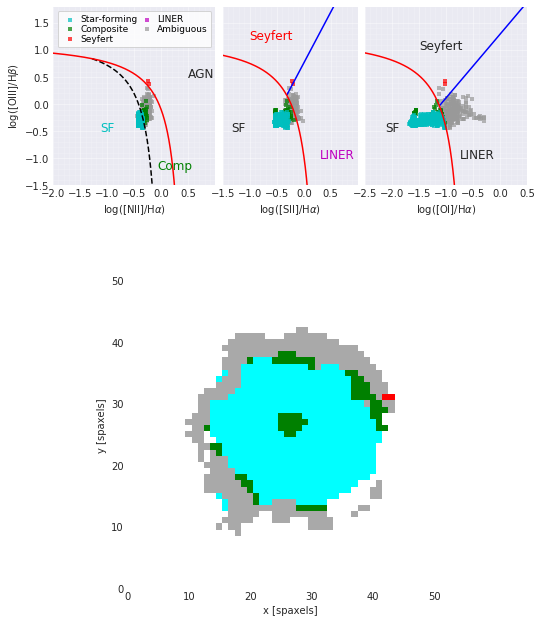

In [7]:
masks, fig, axes = maps.get_bpt()

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7faf38600c50>)

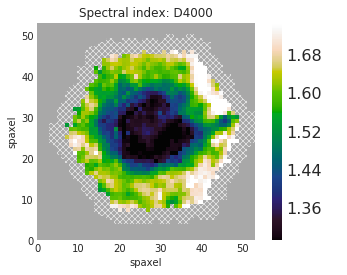

In [8]:
d4000 = maps.specindex_d4000
d4000.plot()


In [9]:
center_aper = maps.getAperture((28, 27), (10, 9, 0), aperture_type='elliptical')

In [10]:
center_spax = center_aper.getSpaxels(threshold=0.8)

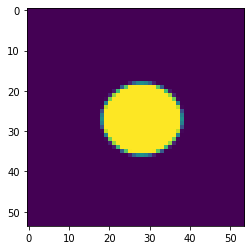

In [80]:
plt.imshow(center_aper.mask, origin='upper')


In [12]:
tail_aper = maps.getAperture([(45, 28)], (7, 4, -0.5), aperture_type='elliptical')

In [13]:
tail_spax = tail_aper.getSpaxels(threshold=0.8)

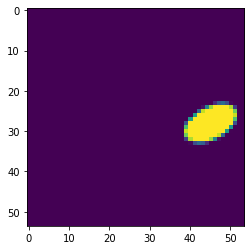

In [14]:
plt.imshow(tail_aper.mask, origin='upper')

In [3]:
tail_spax.

SyntaxError: invalid syntax (<ipython-input-3-3766553d607b>, line 1)

In [15]:
x = maps[tail_spax[0].x, tail_spax[0].y]

In [16]:
array = np.empty([9,9], dtype=np.float64)

In [17]:
a = x.bin_mflux.value

In [18]:
array[0][0] =  x.bin_mflux.value

In [80]:
array

array([[ 2.68771711e-321,  2.60866661e-321,  2.78385561e-180,
         3.01407355e+307,  5.80215291e-041,  1.08042294e+169,
        -3.55011640e-232, -2.00977427e+053,  4.81574459e-276],
       [ 3.44906114e+188, -3.72703270e+020,  2.99145666e-043,
         7.43527792e-079, -2.66872503e-112,  5.12221478e+224,
        -1.90420663e+278,  4.87135808e+099,  1.07276324e+291],
       [-3.76623017e-194,  1.09633537e+158,  5.44575466e+268,
         5.02992139e+006,  4.03904064e+081,  3.30309713e-177,
         4.89546089e-046,  2.98618850e-097,  4.56722176e-203],
       [-1.43872907e+088, -3.70382704e-227,  9.77258339e-224,
        -1.92188202e-039,  8.55168109e+182,  2.72274728e+201,
         1.57464322e-112, -5.62426678e-014, -6.41755157e+274],
       [-3.02376460e-259,  1.15983741e-245,  9.08165575e+051,
         1.98553001e-051, -2.04473565e-184, -1.05519262e+198,
         1.42240396e-161, -4.98767025e+129,  2.67032472e-171],
       [ 6.06880102e+274, -4.34222040e-288, -1.96709296e-060,
   

In [19]:
x.bin_mflux.value

0.0890447

In [20]:
def SpaxProp(SpaxAper):
    
    array = np.empty([len(SpaxAper),9], dtype=np.float64)
    
    for i in range(len(SpaxAper)):
        
        s = maps[SpaxAper[i].x, SpaxAper[i].y]
        
        array[i][0] = s.bin_mflux.value
        array[i][1] = s.bin_snr.value
        array[i][2] = s.emline_gflux_ha_6564.value
        array[i][3] = s.specindex_d4000.value
        array[i][4] = s.specindex_fe4383.value
        array[i][5] = s.specindex_fe5270.value
        array[i][6] = s.specindex_fe5335.value
        array[i][7] = s.specindex_mgb.value
        array[i][8] = s.stellar_vel.value
    
    df = pd.DataFrame(array, columns=['mflux', 'bin_snr', 'gflux_ha', 'd4000', 'fe4383', 'fe5270', 'fe5335', 'mgb', 'stellar_vel'])
    
    return df

In [21]:
CenterProp = SpaxProp(center_spax)

[WARNING]: unclosed <socket.socket fd=46, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.16.0.59', 54412), raddr=('155.101.19.80', 443)> (ResourceWarning)
[WARNING]: unclosed <socket.socket fd=46, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.16.0.59', 54420), raddr=('155.101.19.80', 443)> (ResourceWarning)


In [22]:
TailProp = SpaxProp(tail_spax)

[WARNING]: unclosed <socket.socket fd=46, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.16.0.59', 54422), raddr=('155.101.19.80', 443)> (ResourceWarning)


In [23]:
CenterProp


,mflux,bin_snr,gflux_ha,d4000,fe4383,fe5270,fe5335,mgb,stellar_vel
0,0.298293,16.3611,17.0514,1.46075,5.04738,1.12391,1.960060,2.17245,0.212438
1,0.323922,20.2864,17.6687,1.45595,3.67596,1.09455,1.788260,2.09982,-0.558071
2,0.345100,19.0204,18.4278,1.51654,2.88625,1.20870,1.487900,2.15020,-4.851320
3,0.353776,19.0449,17.9263,1.35948,1.62755,1.33252,1.116700,2.16760,-8.989470
4,0.344355,21.5477,16.2138,1.36862,1.73776,1.46993,0.807102,2.54279,-6.583750
...,...,...,...,...,...,...,...,...,...
258,0.425748,23.8966,35.4395,1.26347,2.58644,1.58059,0.273189,1.99882,14.099100
259,0.368105,19.1158,28.5333,1.31764,3.47289,1.62155,0.143165,2.24229,12.369700
260,0.321620,17.4430,22.3574,1.28413,3.70941,1.67144,0.345427,2.43639,6.491820
261,0.293902,18.1563,19.1841,1.33141,3.15477,1.64096,0.876781,2.47134,-2.108990


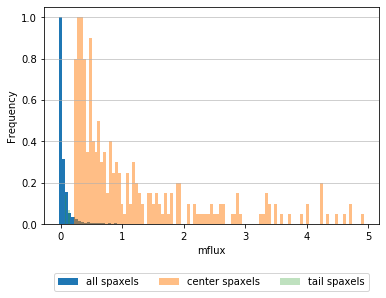

In [61]:
Histogram1(maps.bin_mflux.value, 'all spaxels', 1)
Histogram1(CenterProp['mflux'], 'center spaxels', 0.5)
Histogram1(TailProp['mflux'], 'tail spaxels', 0.3)
plt.legend(loc='upper center',bbox_to_anchor=(0.5, -0.2), ncol = 3)
plt.xlabel('mflux')
plt.ylabel('Frequency')
plt.show()

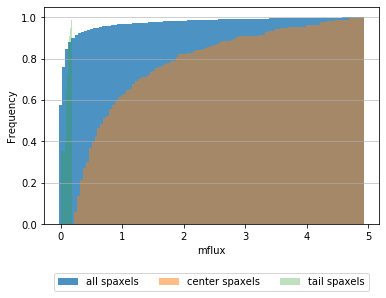

KS test center and tail
Ks_2sampResult(statistic=1.0, pvalue=3.411776531577306e-53)



In [85]:
CumHisto(maps.bin_mflux.value, 'all spaxels', 0.8)
CumHisto(CenterProp['mflux'], 'center spaxels', 0.5)
CumHisto(TailProp['mflux'], 'tail spaxels', 0.3)
plt.legend(loc='upper center',bbox_to_anchor=(0.5, -0.2), ncol = 3)
plt.xlabel('mflux')
plt.ylabel('Frequency')
plt.show()

kstest(CenterProp['mflux'], TailProp['mflux'], 'mflux')


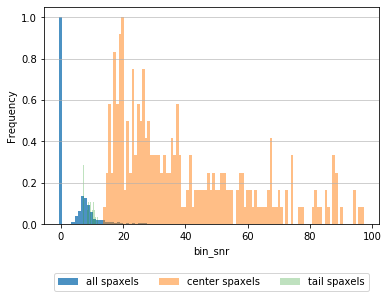

In [63]:
Histogram1(maps.bin_snr.value, 'all spaxels', 0.8)
Histogram1(CenterProp['bin_snr'], 'center spaxels', 0.5)
Histogram1(TailProp['bin_snr'], 'tail spaxels', 0.3)
plt.legend(loc='upper center',bbox_to_anchor=(0.5, -0.2), ncol = 3)
plt.xlabel('bin_snr')
plt.ylabel('Frequency')
plt.show()

[WARNING]: unclosed <socket.socket fd=46, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.16.0.59', 54792), raddr=('155.101.19.80', 443)> (ResourceWarning)


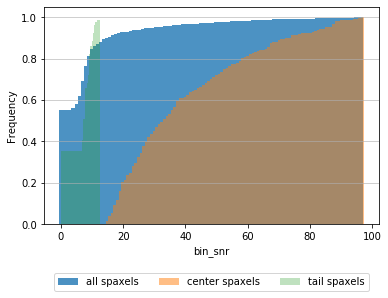

KS test center and tail
Ks_2sampResult(statistic=1.0, pvalue=3.411776531577306e-53)



In [86]:
CumHisto(maps.bin_snr.value, 'all spaxels', 0.8)
CumHisto(CenterProp['bin_snr'], 'center spaxels', 0.5)
CumHisto(TailProp['bin_snr'], 'tail spaxels', 0.3)
plt.legend(loc='upper center',bbox_to_anchor=(0.5, -0.2), ncol = 3)
plt.xlabel('bin_snr')
plt.ylabel('Frequency')
plt.show()

kstest(CenterProp['bin_snr'], TailProp['bin_snr'], 'bin_snr')


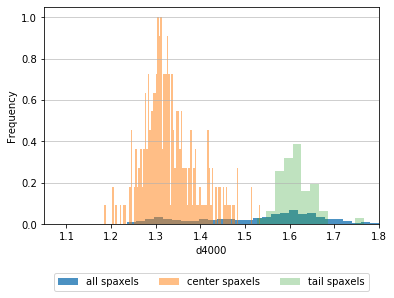

In [65]:
Histogram1(maps.specindex_d4000.value, 'all spaxels', 0.8)
Histogram1(CenterProp['d4000'], 'center spaxels', 0.5)
Histogram1(TailProp['d4000'], 'tail spaxels', 0.3)
plt.legend(loc='upper center',bbox_to_anchor=(0.5, -0.2), ncol = 3)
plt.xlim(1.05,1.8)
plt.xlabel('d4000')
plt.ylabel('Frequency')
plt.show()

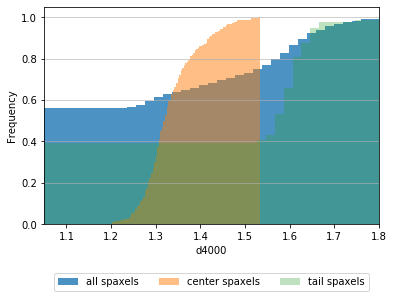

KS test center and tail
Ks_2sampResult(statistic=0.6075949367088608, pvalue=6.615526107567934e-20)



In [87]:
CumHisto(maps.specindex_d4000.value, 'all spaxels', 0.8)
CumHisto(CenterProp['d4000'], 'center spaxels', 0.5)
CumHisto(TailProp['d4000'], 'tail spaxels', 0.3)
plt.legend(loc='upper center',bbox_to_anchor=(0.5, -0.2), ncol = 3)
plt.xlim(1.05,1.8)
plt.xlabel('d4000')
plt.ylabel('Frequency')
plt.show()

kstest(CenterProp['d4000'], TailProp['d4000'], 'bin_snr')


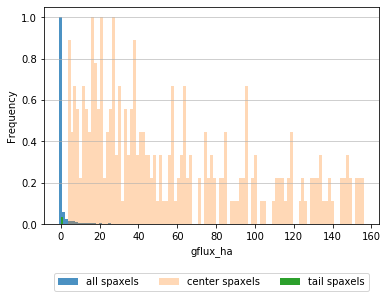

In [67]:
Histogram1(maps.emline_gflux_ha_6564.value, 'all spaxels', 0.8)
Histogram1(CenterProp['gflux_ha'], 'center spaxels', 0.3)
Histogram1(TailProp['gflux_ha'], 'tail spaxels', 1)
plt.legend(loc='upper center',bbox_to_anchor=(0.5, -0.2), ncol = 3)
#plt.xlim(1.05,1.8)
plt.xlabel('gflux_ha')
plt.ylabel('Frequency')
plt.show()

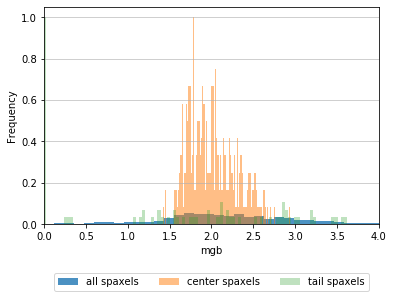

In [72]:
Histogram1(maps.specindex_mgb.value, 'all spaxels', 0.8)
Histogram1(CenterProp['mgb'], 'center spaxels', 0.5)
Histogram1(TailProp['mgb'], 'tail spaxels', 0.3)
plt.legend(loc='upper center',bbox_to_anchor=(0.5, -0.2), ncol = 3)
plt.xlim(0,4)
plt.xlabel('mgb')
plt.ylabel('Frequency')
plt.show()

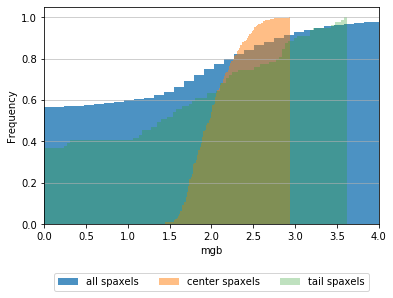

KS test center and tail
Ks_2sampResult(statistic=0.5252923906242479, pvalue=5.503405790771123e-15)



In [88]:
CumHisto(maps.specindex_mgb.value, 'all spaxels', 0.8)
CumHisto(CenterProp['mgb'], 'center spaxels', 0.5)
CumHisto(TailProp['mgb'], 'tail spaxels', 0.3)
plt.legend(loc='upper center',bbox_to_anchor=(0.5, -0.2), ncol = 3)
plt.xlim(0,4)
plt.xlabel('mgb')
plt.ylabel('Frequency')
plt.show()

kstest(CenterProp['mgb'], TailProp['mgb'], 'bin_snr')


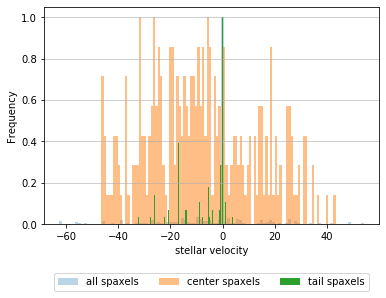

In [54]:
Histogram1(maps.stellar_vel.value, 'all spaxels', 0.3)
Histogram1(CenterProp['stellar_vel'], 'center spaxels', 0.5)
Histogram1(TailProp['stellar_vel'], 'tail spaxels', 1)
plt.legend(loc='upper center',bbox_to_anchor=(0.5, -0.2), ncol = 3)
#plt.xlim(1.05,1.8)
plt.xlabel('stellar velocity')
plt.ylabel('Frequency')
plt.show()

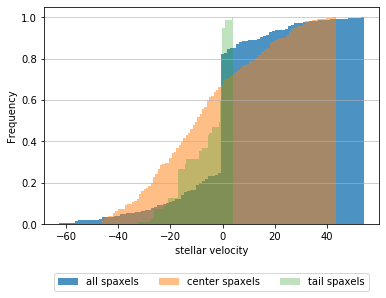

KS test center and tail
Ks_2sampResult(statistic=0.29152428165760214, pvalue=4.6384089002371454e-05)



In [89]:
CumHisto(maps.stellar_vel.value, 'all spaxels', 0.8)
CumHisto(CenterProp['stellar_vel'], 'center spaxels', 0.5)
CumHisto(TailProp['stellar_vel'], 'tail spaxels', 0.3)
plt.legend(loc='upper center',bbox_to_anchor=(0.5, -0.2), ncol = 3)
plt.xlabel('stellar velocity')
plt.ylabel('Frequency')
plt.show()

kstest(CenterProp['stellar_vel'], TailProp['stellar_vel'], 'bin_snr')


In [ ]:
""""""

(array([2.96532288, 0.        , 0.10225251, 0.20450503, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.20450503,
        0.20450503, 0.30675754, 0.20450503, 0.30675754, 0.20450503,
        0.20450503, 0.20450503, 0.40901005, 0.30675754, 0.20450503,
        0.        , 0.20450503, 0.10225251, 0.51126257, 0.30675754,
        0.20450503, 0.30675754, 0.        , 0.20450503, 0.20450503]),
 array([-0.0756442 ,  0.04814961,  0.17194341,  0.29573722,  0.41953103,
         0.54332483,  0.66711864,  0.79091245,  0.91470625,  1.03850006,
         1.16229387,  1.28608767,  1.40988148,  1.53367529,  1.65746909,
         1.7812629 ,  1.90505671,  2.02885051,  2.15264432,  2.27643813,
         2.40023193,  2.52402574,  2.64781955,  2.77161335,  2.89540716,
         3.01920097,  3.14299477,  3.26678858,  3.39058239,  3.51437619,
         3.63817   ]),
 <a list of 30 Patch objects>)

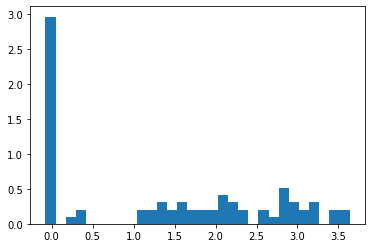

In [41]:
plt.hist(TailProp['mgb'], density=True, bins=30)

(array([ 0.32633873,  0.65267747,  0.32633873,  0.9790162 ,  0.65267747,
         2.28437114,  3.26338734,  4.24240354,  6.52677468,  6.85311341,
        11.42185569,  7.83212961,  7.17945215,  5.22141974,  6.20043595,
         2.93704861,  3.26338734,  2.61070987,  1.30535494,  1.30535494,
         3.58972607,  0.65267747,  1.9580324 ,  1.30535494,  0.9790162 ,
         0.9790162 ,  0.        ,  0.        ,  0.65267747,  0.32633873]),
 array([1.18636   , 1.19801133, 1.20966267, 1.221314  , 1.23296533,
        1.24461667, 1.256268  , 1.26791933, 1.27957067, 1.291222  ,
        1.30287333, 1.31452467, 1.326176  , 1.33782733, 1.34947867,
        1.36113   , 1.37278133, 1.38443267, 1.396084  , 1.40773533,
        1.41938667, 1.431038  , 1.44268933, 1.45434067, 1.465992  ,
        1.47764333, 1.48929467, 1.500946  , 1.51259733, 1.52424867,
        1.5359    ]),
 <a list of 30 Patch objects>)

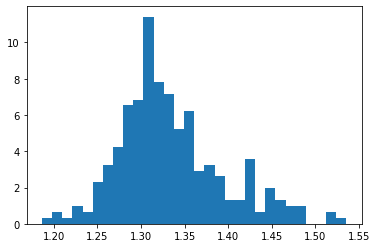

In [91]:
plt.hist(CenterProp['d4000'], density=True, bins=30)

(array([0.01272538, 0.00890777, 0.00381762, 0.00890777, 0.01399792,
        0.01018031, 0.02290569, 0.01527046, 0.01018031, 0.01781554,
        0.01781554, 0.01781554, 0.01781554, 0.02545077, 0.01399792,
        0.016543  , 0.00636269, 0.01272538, 0.00763523, 0.00763523,
        0.01145285, 0.01272538, 0.00636269, 0.00763523, 0.01145285,
        0.00381762, 0.00636269, 0.00381762, 0.        , 0.00254508]),
 array([-45.9749 , -42.98695, -39.999  , -37.01105, -34.0231 , -31.03515,
        -28.0472 , -25.05925, -22.0713 , -19.08335, -16.0954 , -13.10745,
        -10.1195 ,  -7.13155,  -4.1436 ,  -1.15565,   1.8323 ,   4.82025,
          7.8082 ,  10.79615,  13.7841 ,  16.77205,  19.76   ,  22.74795,
         25.7359 ,  28.72385,  31.7118 ,  34.69975,  37.6877 ,  40.67565,
         43.6636 ]),
 <a list of 30 Patch objects>)

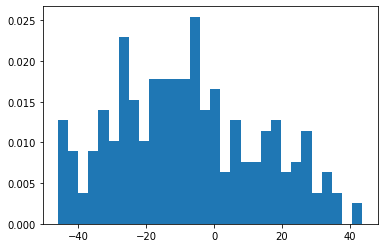

In [92]:
plt.hist(CenterProp['stellar_vel'], density=True, bins=30)
plt.hist(TailProp['stellar_vel'], density=True, bins=30)

In [14]:
center_aper

<MarvinAperture([[28., 27.]], a=10.0, b=9.0, theta=0.0)>

In [15]:
center_spax 

[<Marvin Spaxel (x=25, y=19, loaded=False),
 <Marvin Spaxel (x=26, y=19, loaded=False),
 <Marvin Spaxel (x=27, y=19, loaded=False),
 <Marvin Spaxel (x=28, y=19, loaded=False),
 <Marvin Spaxel (x=29, y=19, loaded=False),
 <Marvin Spaxel (x=30, y=19, loaded=False),
 <Marvin Spaxel (x=31, y=19, loaded=False),
 <Marvin Spaxel (x=23, y=20, loaded=False),
 <Marvin Spaxel (x=24, y=20, loaded=False),
 <Marvin Spaxel (x=25, y=20, loaded=False),
 <Marvin Spaxel (x=26, y=20, loaded=False),
 <Marvin Spaxel (x=27, y=20, loaded=False),
 <Marvin Spaxel (x=28, y=20, loaded=False),
 <Marvin Spaxel (x=29, y=20, loaded=False),
 <Marvin Spaxel (x=30, y=20, loaded=False),
 <Marvin Spaxel (x=31, y=20, loaded=False),
 <Marvin Spaxel (x=32, y=20, loaded=False),
 <Marvin Spaxel (x=33, y=20, loaded=False),
 <Marvin Spaxel (x=21, y=21, loaded=False),
 <Marvin Spaxel (x=22, y=21, loaded=False),
 <Marvin Spaxel (x=23, y=21, loaded=False),
 <Marvin Spaxel (x=24, y=21, loaded=False),
 <Marvin Spaxel (x=25, y=21, loa

In [16]:
maps.

SyntaxError: invalid syntax (<ipython-input-16-3c2162e41896>, line 1)

(array([1.50293199, 0.9453927 , 0.65450264, 0.48481677, 0.36361258,
        0.21816755, 0.3151309 , 0.19392671, 0.16968587, 0.14544503,
        0.16968587, 0.12120419, 0.09696335, 0.07272252, 0.09696335,
        0.09696335, 0.12120419, 0.02424084, 0.        , 0.12120419,
        0.09696335, 0.02424084, 0.02424084, 0.02424084, 0.04848168,
        0.09696335, 0.02424084, 0.02424084, 0.07272252, 0.02424084]),
 array([0.242969  , 0.39982337, 0.55667773, 0.7135321 , 0.87038647,
        1.02724083, 1.1840952 , 1.34094957, 1.49780393, 1.6546583 ,
        1.81151267, 1.96836703, 2.1252214 , 2.28207577, 2.43893013,
        2.5957845 , 2.75263887, 2.90949323, 3.0663476 , 3.22320197,
        3.38005633, 3.5369107 , 3.69376507, 3.85061943, 4.0074738 ,
        4.16432817, 4.32118253, 4.4780369 , 4.63489127, 4.79174563,
        4.9486    ]),
 <a list of 30 Patch objects>)

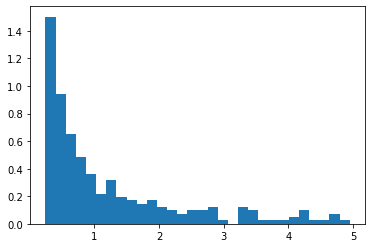

In [88]:
plt.hist(CenterProp['mflux'], density=True, bins=30)

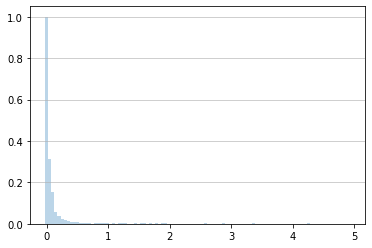

In [47]:
Histogram1(maps.bin_mflux.value, 'all spaxels', 0.3)
